In [2]:
import tensorflow as tf

tf.__version__

'2.9.1'

In [3]:
import tensorflow as tf

gpus = tf.config.list_physical_devices("GPU")

if gpus:
    tf.config.experimental.set_memory_growth(gpus[0], True)  #设置GPU显存用量按需使用
    tf.config.set_visible_devices([gpus[0]],"GPU")

# 打印显卡信息，确认GPU可用
print(gpus)


[]


In [4]:
import matplotlib.pyplot as plt
# 支持中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

import os,PIL

# 设置随机种子尽可能使结果可以重现
import numpy as np
np.random.seed(1)

# 设置随机种子尽可能使结果可以重现
import tensorflow as tf
tf.random.set_seed(1)

import pathlib

PIL.__version__

'8.4.0'

In [6]:
data_dir = "E:\demo_study\jupyter\Jupyter_notebook\Recognition-of-eye-state-based-on-CNN\Eye_dataset"

data_dir = pathlib.Path(data_dir)

In [7]:
image_count = len(list(data_dir.glob('*/*')))

print("图片总数为：",image_count)

图片总数为： 4308


In [8]:
batch_size = 8
img_height = 224
img_width = 224

In [9]:
data_dir

WindowsPath('E:/demo_study/jupyter/Jupyter_notebook/Recognition-of-eye-state-based-on-CNN/Eye_dataset')

In [10]:
"""
关于image_dataset_from_directory()的详细介绍可以参考文章：https://mtyjkh.blog.csdn.net/article/details/117018789
"""
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=12,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 4308 files belonging to 4 classes.
Using 3447 files for training.


In [11]:
"""
关于image_dataset_from_directory()的详细介绍可以参考文章：https://mtyjkh.blog.csdn.net/article/details/117018789
"""
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=12,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 4308 files belonging to 4 classes.
Using 861 files for validation.


In [12]:
class_names = train_ds.class_names
print(class_names)
class_names = val_ds.class_names
print(class_names)

['close_look', 'forward_look', 'left_look', 'right_look']
['close_look', 'forward_look', 'left_look', 'right_look']


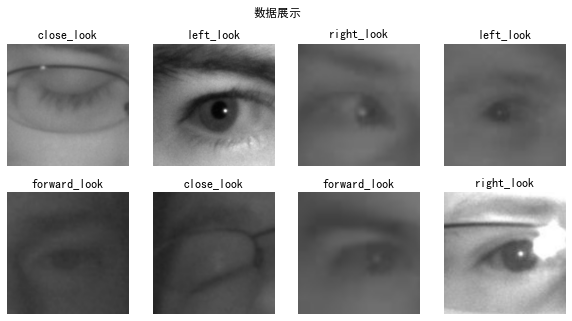

In [13]:
plt.figure(figsize=(10, 5))  # 图形的宽为10高为5
plt.suptitle("数据展示")

for images, labels in train_ds.take(1):
    for i in range(8):
        
        ax = plt.subplot(2, 4, i + 1)  
        
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.savefig('pic1.jpg', dpi=600) #指定分辨率保存
        plt.axis("off")

In [14]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(8, 224, 224, 3)
(8,)


In [15]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds   = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [47]:
model = tf.keras.applications.VGG16()
# 打印模型信息
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [48]:
# 设置初始学习率
initial_learning_rate = 1e-4

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate, 
        decay_steps=20,      # 敲黑板！！！这里是指 steps，不是指epochs
        decay_rate=0.96,     # lr经过一次衰减就会变成 decay_rate*lr
        staircase=True)

# 将指数衰减学习率送入优化器
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

In [49]:
model.compile(optimizer=optimizer,
              loss     ='sparse_categorical_crossentropy',
              metrics  =['accuracy'])

In [16]:
epochs = 10

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/10
431/431 [==============================] - 266s 604ms/step - loss: 0.4236 - accuracy: 0.8567 - val_loss: 0.1470 - val_accuracy: 0.9501
Epoch 2/10
431/431 [==============================] - 254s 589ms/step - loss: 0.0895 - accuracy: 0.9698 - val_loss: 0.0959 - val_accuracy: 0.9721
Epoch 3/10
431/431 [==============================] - 254s 589ms/step - loss: 0.0406 - accuracy: 0.9881 - val_loss: 0.0923 - val_accuracy: 0.9733
Epoch 4/10
431/431 [==============================] - 253s 587ms/step - loss: 0.0215 - accuracy: 0.9942 - val_loss: 0.1004 - val_accuracy: 0.9733
Epoch 5/10
431/431 [==============================] - 253s 587ms/step - loss: 0.0161 - accuracy: 0.9951 - val_loss: 0.0996 - val_accuracy: 0.9791
Epoch 6/10
431/431 [==============================] - 253s 587ms/step - loss: 0.0133 - accuracy: 0.9962 - val_loss: 0.1016 - val_accuracy: 0.9779
Epoch 7/10
431/431 [==============================] - 253s 587ms/step - loss: 0.0116 - accuracy: 0.9965 - val_loss: 0.1027 -

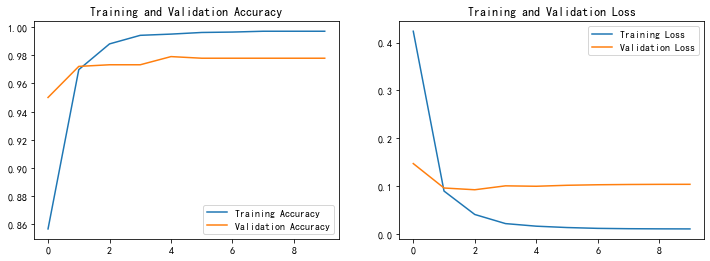

In [34]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)

plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('pic2.jpg', dpi=600) #指定分辨率保存
plt.show()

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd

# 定义一个绘制混淆矩阵图的函数
def plot_cm(labels, predictions):
    
    # 生成混淆矩阵
    conf_numpy = confusion_matrix(labels, predictions)
    # 将矩阵转化为 DataFrame
    conf_df = pd.DataFrame(conf_numpy, index=class_names ,columns=class_names)  
    plt.figure(figsize=(8,7))
    sns.heatmap(conf_df, annot=True, fmt="d", cmap="BuPu")
    plt.title('混淆矩阵',fontsize=15)
    plt.ylabel('真实值',fontsize=14)
    plt.xlabel('预测值',fontsize=14)
    plt.savefig('pic3.jpg', dpi=600) #指定分辨率保存

In [19]:
val_pre   = []
val_label = []

for images, labels in val_ds:#这里可以取部分验证数据（.take(1)）生成混淆矩阵
    for image, label in zip(images, labels):
        # 需要给图片增加一个维度
        img_array = tf.expand_dims(image, 0) 
        # 使用模型预测图片中的人物
        prediction = model.predict(img_array)

        val_pre.append(class_names[np.argmax(prediction)])
        val_label.append(class_names[label])


1/1 [==============================] - 0s 171ms/step


1/1 [==============================] - 0s 162ms/step


1/1 [==============================] - 0s 177ms/step


1/1 [==============================] - 0s 162ms/step


1/1 [==============================] - 0s 372ms/step


1/1 [==============================] - 0s 306ms/step


In [22]:
val_pre

['close_look',
 'close_look',
 'right_look',
 'forward_look',
 'left_look',
 'forward_look',
 'forward_look',
 'close_look',
 'right_look',
 'forward_look',
 'close_look',
 'right_look',
 'forward_look',
 'left_look',
 'right_look',
 'close_look',
 'forward_look',
 'forward_look',
 'left_look',
 'right_look',
 'forward_look',
 'close_look',
 'forward_look',
 'forward_look',
 'close_look',
 'right_look',
 'close_look',
 'left_look',
 'close_look',
 'right_look',
 'forward_look',
 'close_look',
 'right_look',
 'forward_look',
 'forward_look',
 'close_look',
 'left_look',
 'right_look',
 'left_look',
 'forward_look',
 'right_look',
 'right_look',
 'left_look',
 'right_look',
 'right_look',
 'forward_look',
 'close_look',
 'right_look',
 'forward_look',
 'forward_look',
 'close_look',
 'forward_look',
 'right_look',
 'left_look',
 'left_look',
 'left_look',
 'close_look',
 'forward_look',
 'forward_look',
 'forward_look',
 'close_look',
 'left_look',
 'forward_look',
 'left_look',
 'left_l

In [24]:
type(val_pre)

list

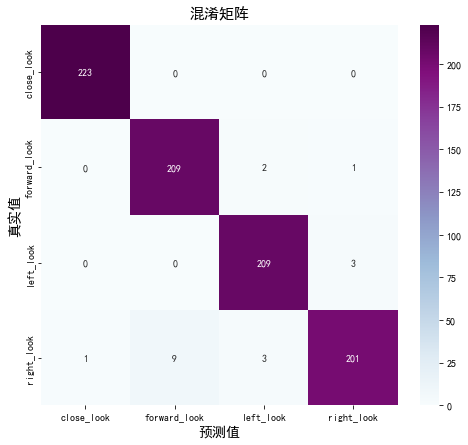

In [28]:
plot_cm(val_label, val_pre)

In [29]:
conf_numpy = confusion_matrix(val_label, val_pre)
conf_numpy

array([[223,   0,   0,   0],
       [  0, 209,   2,   1],
       [  0,   0, 209,   3],
       [  1,   9,   3, 201]], dtype=int64)

In [23]:
# 保存模型
model.save('model/17_model.h5')

1/1 [==============================] - 0s 209ms/step


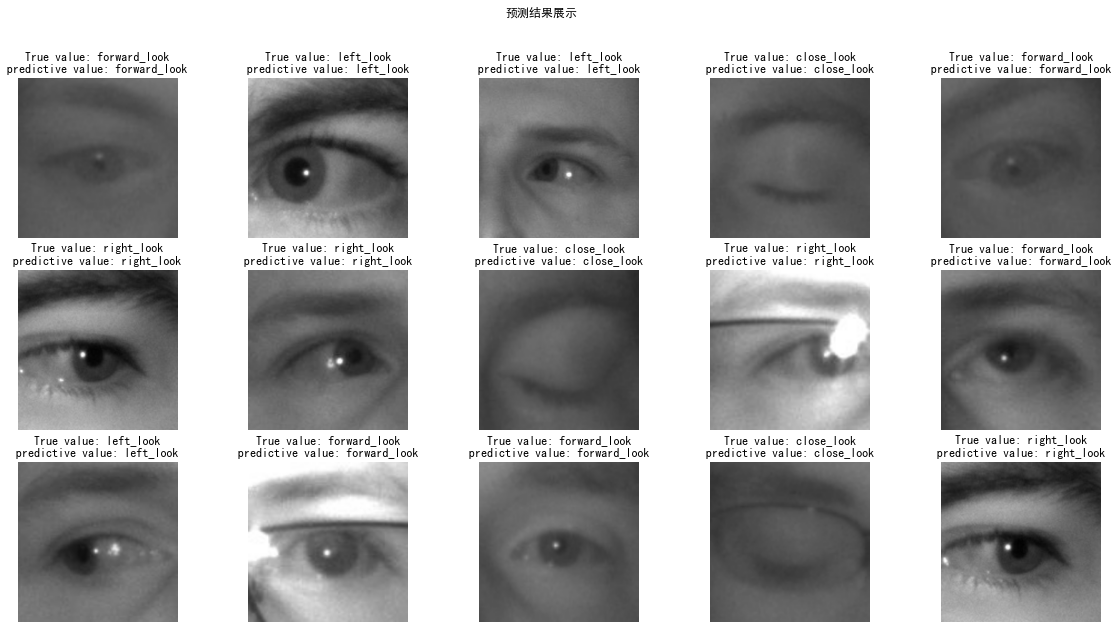

In [17]:
# 采用加载的模型（new_model）来看预测结果

model = tf.keras.models.load_model('model/17_model.h5')
plt.figure(figsize=(20, 10))  # 图形的宽为10高为5
plt.suptitle("预测结果展示")

num = -1
for images, labels in val_ds.take(2):
    for i in range(8):
        num = num + 1
        plt.subplots_adjust(left=None, bottom=None, right=None, top=None , wspace=0.2, hspace=0.2)
        if num >= 15:
            break
        ax = plt.subplot(3, 5, num + 1)  
        
        # 显示图片
        plt.imshow(images[i].numpy().astype("uint8"))
        
        # 需要给图片增加一个维度
        img_array = tf.expand_dims(images[i], 0) 
        
        # 使用模型预测图片中的人物
        predictions = model.predict(img_array)
        plt.title("True value: {}\npredictive value: {}".format(class_names[labels[i]],class_names[np.argmax(predictions)]))
#         plt.savefig('pic4.jpg', dpi=600) #指定分辨率保存
        plt.axis("off")